In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

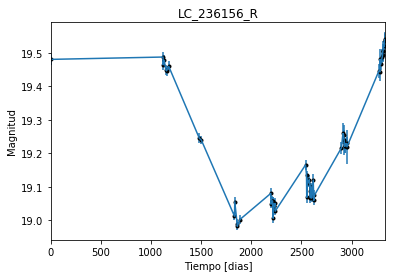

In [2]:
data = np.genfromtxt('LC_236156_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_236156_R')
plt.savefig("LC_236156_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

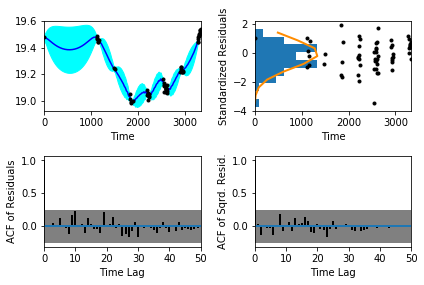

In [5]:
sample.assess_fit()

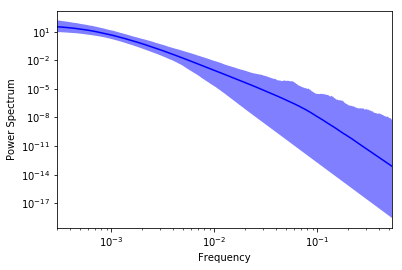

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

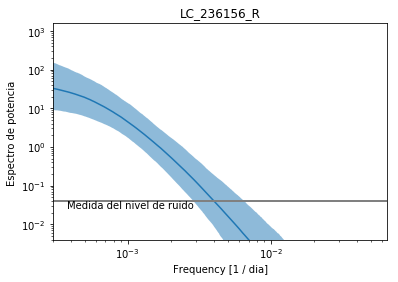

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_236156_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_236156_R')

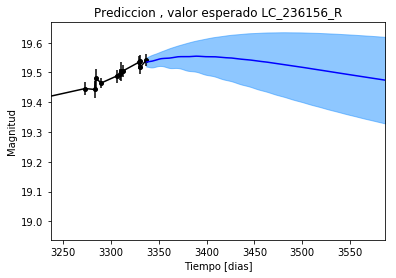

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_236156_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_236156_R')

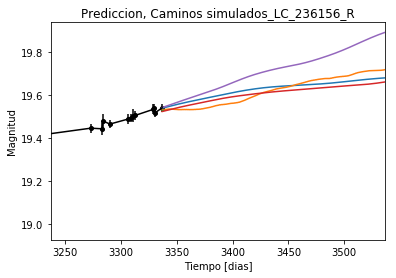

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_236156_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


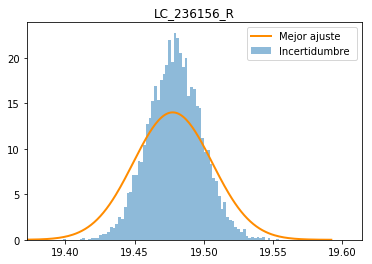

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_236156_R')
plt.savefig("Mejor_ajuste_LC_236156_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_236156_R')

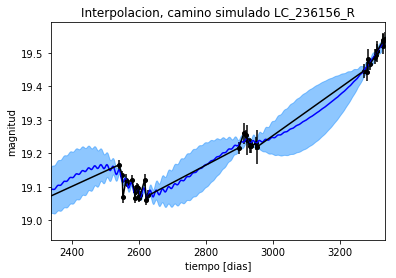

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_R')

Text(0.5,1,'Interpolacion, camino simulado LC_236156_R')

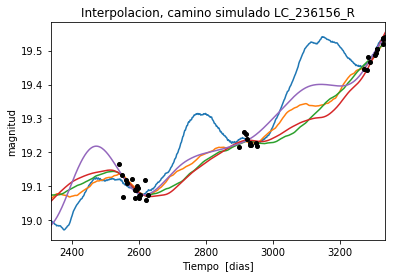

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1782.90457733
Median: 0.0153280098432
Standard deviation: 0.216519522392
68% credibility interval: [ 0.0011339  0.2567671]
95% credibility interval: [  3.84024773e-04   8.27968787e-01]
99% credibility interval: [  3.13540272e-04   1.01385554e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 822.366824711
Median: 0.00117691117161
Standard deviation: 0.0722846658212
68% credibility interval: [ 0.00042249  0.01471629]
95% credibility interval: [ 0.00031474  0.19088056]
99% credibility interval: [  3.02958505e-04   5.35240258e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 611.463809857
Median: 0.00489255593546
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1356.50479736
Median: 158.278091119
Standard deviation: 1.56155666235
68% credibility interval: [ 156.53112059  159.3819651 ]
95% credibility interval: [ 154.07741363  160.02179659]
99% credibility interval: [ 151.93855793  160.56098333]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 691.128105882
Median: 0.555826496998
Standard deviation: 2.12557874879
68% credibility interval: [ 0.03991619  3.61471223]
95% credibility interval: [ 0.01215109  7.31240621]
99% credibility interval: [  9.18608900e-03   9.64352517e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1088.46285017
Median: 0.209066579996
Standard deviation: 8.4813243506
68% credibility interval: [ 0.01315872  5.40374831]
95% credibility interval: [  8.00

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1164.68003873
Median: 7.43762515364e-35
Standard deviation: 37.6581867646
68% credibility interval: [  6.01847199e-74   1.73228372e-07]
95% credibility interval: [  1.97828718e-109   1.22226436e+001]
99% credibility interval: [  4.09166012e-172   8.88919755e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2066.88848016
Median: 19.3384279228
Standard deviation: 0.142741036134
68% credibility interval: [ 19.22651148  19.46086235]
95% credibility interval: [ 19.0838892   19.65075202]
99% credibility interval: [ 18.95106074  19.90258441]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 466.003793884
Median: 0.000294828797864
Standard deviation: 0.230191150096
68% credibility interval: [ 0.          0.22173005]
95% credibility interval: [ 0.         0.8879939]
99% credibility interval: [ 0.         1.0362128]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 466.003793884
Median: 0.000294828797864
Standard deviation: 0.230191150096
68% credibility interval: [ 0.          0.22173005]
95% credibility interval: [ 0.         0.8879939]
99% credibility interval: [ 0.         1.0362128]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 7789.09808461
Median: 0.0
Standard deviation: 0.000192373663557
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1356.50479736
Median: 158.278091119
Standard deviation: 1.56155666235
68% credibility interval: [ 156.53112059  159.3819651 ]
95% credibility interval: [ 154.07741363  160.02179659]
99% credibility interval: [ 151.93855793  160.56098333]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1271.91623018
Median: 0.0518253924898
Standard deviation: 0.0628130126563
68% credibility interval: [ 0.02902028  0.10891587]
95% credibility interval: [ 0.01776946  0.24504023]
99% credibility interval: [ 0.01334661  0.38864253]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2211.47742016
Median: 1.17178053799
Standard deviation: 0.183953889509
68% credibility interval: [ 1.00840615  1.37099303]
95% credibility interval: [ 0.88771849  1.60280764]
99% credibility interval: [ 0.81524769  1.76244846]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1298.03968125
Median: 2.89279817956e-05
Standard deviation: 0.00254266100273
68% credibility interval: [  1.40795188e-06   7.65111338e-04]
95% credibility interval: [  6.61494357e-08   5.01997194e-03]
99% credibility interval: [  2.13922756e-08   1.05957405e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1782.90457733
Median: (-0.0963087262349-3.1687948242j)
Standard deviation: 1.98561250668
68% credibility interval: [-1.61331526+0.j         -0.00712450-0.03797579j]
95% credibility interval: [ -5.20228132e+00+0.j          -2.41289881e-03-0.00068598j]
99% credibility interval: [ -6.37024222e+00+0.j          -1.97003163e-03-1.56023007j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 822.366824711
Median: (-0.00739475098133+0.381352710741j)
Standard deviation: 1.51596789008
68% credibility interval: [-0.09246520+0.j -0.00265456+0.j]
95% credibility interval: [-1.19933793+1.04957845j -0.00197759+0.j        ]
99% credibility interval: [ -3.36301373e+00 +5.22930941e+00j  -1.90354443e-03 +2.94936162e-03j]
Posterior summary f